# Graduate Admission Analysis and Prediction

### Purpose

To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.

### Dataset

This dataset is created for prediction of graduate admissions and the dataset link is below:

https://www.kaggle.com/mohansacharya/graduate-admissions
Features in the dataset:

GRE Scores (290 to 340)

TOEFL Scores (92 to 120)

University Rating (1 to 5)

Statement of Purpose (1 to 5)

Letter of Recommendation Strength (1 to 5)

Undergraduate CGPA (6.8 to 9.92)

Research Experience (0 or 1)

Chance of Admit (0.34 to 0.97)

### Step1: Data Collection/ Data Extraction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Dataset
data = pd.read_csv("Logistic Regression/Admission_Predict/Admission_Predict.csv")
data.shape

(400, 9)

In [3]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [5]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [4]:
data.drop('Serial No.', axis=1, inplace=True)

In [5]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

### Step 2:  Data Analysis or Data Exploration

In [6]:
#Let's see top 10 observation row and column wise
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
# Let's see the detail information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [8]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

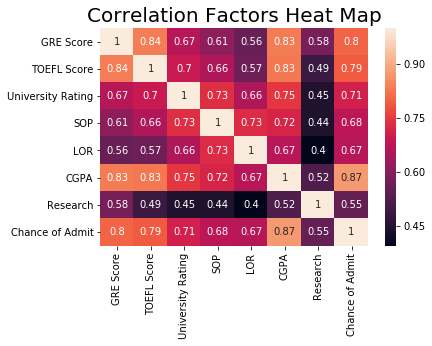

In [9]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

##### GRE Scores

The Graduate Record Examinations (GRE) is a the most popular test for graduate schools' admission, it consists of three sections : Analytical Writing, Verbal and Quantitative.

The test's maximum score is 340 and minimum is 260, and according to an official GRE score document, the mean test score for all individuals from July 1,2014 to June 30,2017 (almost 1,700,000 test taker) is 306.35 which rounds to 306 with an average standard deviation of 7.19

source: https://www.ets.org/s/gre/pdf/gre_interpreting_scores.pdf

In [10]:
# Isolating GRE Score data
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,400.000000
mean,316.807500
std,11.473646
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


The sample's GRE score mean is 316 which is a little bit higher than the mean mentioned previously (306)

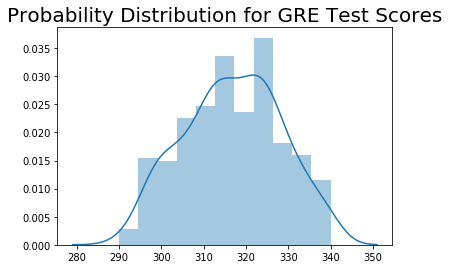

In [12]:
# # Probability Distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')
plt.show()

As the distribution plot shows, the GRE test scores are somehow normally distributed.

In [13]:
# Correlation Coeffecients for GRE Score Test
GRE_CORR = pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score', axis=0, inplace=True)
GRE_CORR.rename({'GRE Score': 'GRE Correlation Coeff'}, axis=1, inplace=True)
GRE_CORR

,GRE Correlation Coeff
TOEFL Score,0.835977
University Rating,0.668976
SOP,0.612831
LOR,0.557555
CGPA,0.833060
Research,0.580391
Chance of Admit,0.802610


##### TOEFL Score

Test of English as a Foreign Language (TOEFL) is a very popular test for English language amongst universities worldwide, it is marked based on three sections: Reading, Listening, Speaking, and Writing, each one of them is out of 30, yielding a maximum score of 120 and a minimum of 0.

ETS (the institute that offers the test) recorded a mean score of 82.6 with a standard deviation of 19.5 (https://www.ets.org/s/toefl/pdf/94227_unlweb.pdf).

Although this is the mean for a wide range of students from all around the world that took the test for different purposes, as students applying for an engineering graduate degree might have a higher average than high school students.

In [14]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(data['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,400.000000
mean,107.410000
std,6.069514
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


It's evident that the sample over performs in the TOEFL.

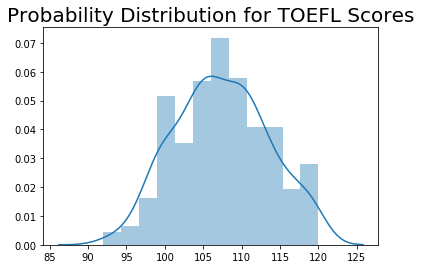

In [15]:
# Probability distribution for TOEFL Scores
sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='20')
plt.show()

##### CGPA
Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

In [16]:
# Isolating and describing the CGPA
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,400.000000
mean,8.598925
std,0.596317
min,6.800000
25%,8.170000
50%,8.610000
75%,9.062500
max,9.920000


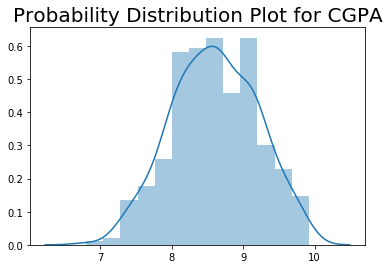

In [17]:
sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='20')
plt.show()

##### Research

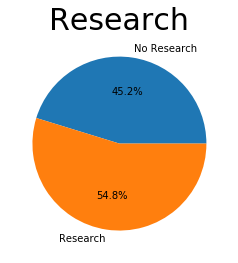

In [18]:
RES_Count = data.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

##### University Rating
The rating of the university the student completed his undergraduate degree from.

In [19]:
# Isolating and describing 
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,26
2,107
3,133
4,74
5,60


How good the university is a value between 1 and 5 in integer increment , and since it has positive correlation factors with other variables it's clear that 5 is the highest rating and 1 is the lowest.

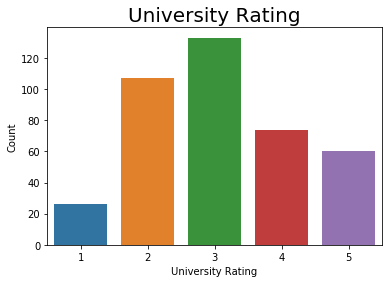

In [20]:
# Barplot for the distribution of the University Rating
sns.barplot(University_Rating.index, University_Rating['Count']).set_title('University Rating', size='20')
plt.show()

##### SOP
Statement of Purpose (SOP) is a letter written by the student himself to state his purpose and motivation for completing a graduate degree in addition to his goals while and after he completes his study. Many universities find this letter significant because it better describe the student from a personal perspective.

In [21]:
#Isolating and describing
SOP = pd.DataFrame(data.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,20
2.0,33
2.5,47
3.0,64
3.5,70
4.0,70
4.5,53
5.0,37


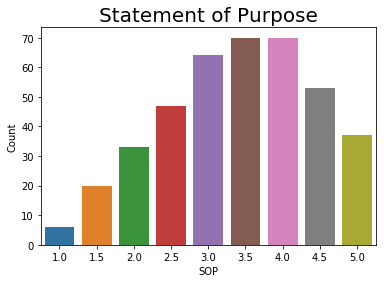

In [22]:
# Barplot for SOP 
sns.barplot(SOP.index, SOP['Count']).set_title('Statement of Purpose', size='20')
plt.show()

Exploring this variable, it's ordered from 1 to 5 with 0.5 increments, although the criteria for assessment isn't specified, which will make it harder to deal with new entries.

##### LOR
Letter of Recommendation (LOR) is a letter written by a person that knows the student and recommends that the university accept his admission, this person can be a professor in his undergraduate degree or a professional whom the student have worked with.

In [23]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,7
2.0,38
2.5,39
3.0,85
3.5,73
4.0,77
4.5,45
5.0,35


THE LOR is ordered same as the SOP

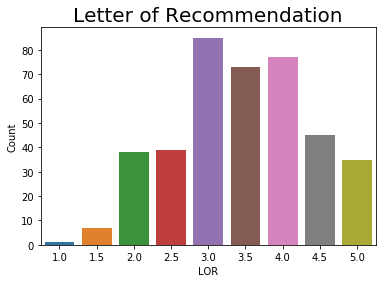

In [24]:
# Distribution of the LOR
sns.barplot(LOR.index, LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

Are students in this sample too good?

First looking at the students LOR, SOP and University Ratings, most students score (4-5) on the scales, not many scored (1-2.5).

Nonetheless, comparing means for their GRE and TOEFL scores, which are of a universal criteria, they clearly perform better than the average student as the ETS states.

To conclude, it seems only wise to consider the sample to be somehow above average.

##### Chance of Admission

Let's first take a review on the chances of admission.

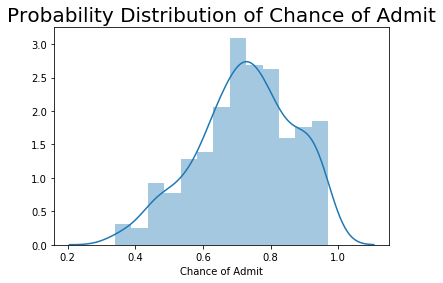

In [25]:
data['Chance of Admit']
sns.distplot(data['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')
plt.show()

In [29]:
data.describe()['Chance of Admit']

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit, dtype: float64

And since one of our goals is to predict the chance of admission, let's take a look on how the different variables correlate with it.

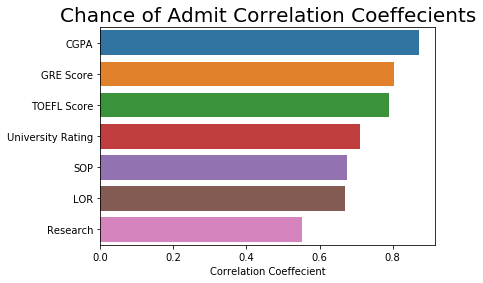

In [26]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score

In [27]:
COA_corr

,Correlation Coeffecient
CGPA,0.873289
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
Research,0.553202


## Prediction Models : Regression Algorithm (Supervised Machine Learning)

1. Linear Regression
2. Decision Tree
3. Random Forest

### Step 3: Train Algorithm

In [29]:
X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']

In [30]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CGPA','GRE Score', 'TOEFL Score']] = scaler.fit_transform(X[['CGPA','GRE Score', 'TOEFL Score']])

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [32]:
#### Linear Regression (All Features)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

### Step4 : Test Algorithm

In [36]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [35]:
pd.DataFrame({"Actual": y_test, "Predict": y_test}).head()

,Actual,Predict
38,0.52,0.52
387,0.53,0.53
270,0.72,0.72
181,0.71,0.71
195,0.78,0.78


In [37]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.7582154534847563 
Linear Regression MSE: 0.004242341981774605, 
Linear Regression RMSE:0.06513326325138796


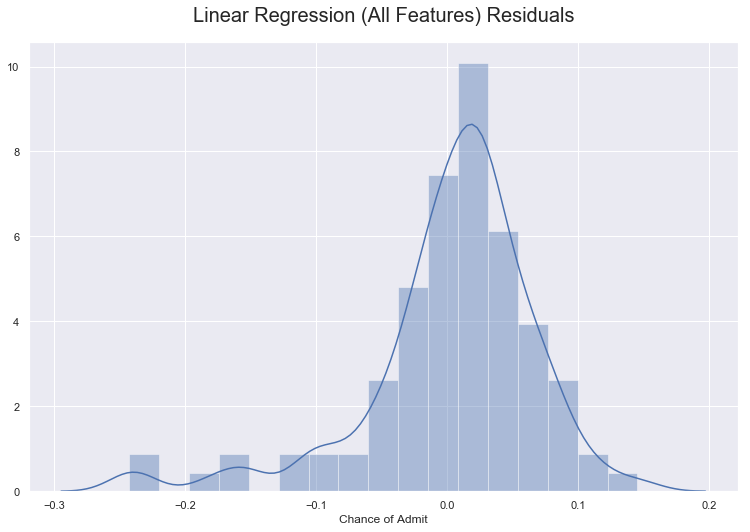

In [39]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test - y_pred))
plt.title('Linear Regression (All Features) Residuals', fontdict={'fontsize':20}, pad=20)
plt.show()

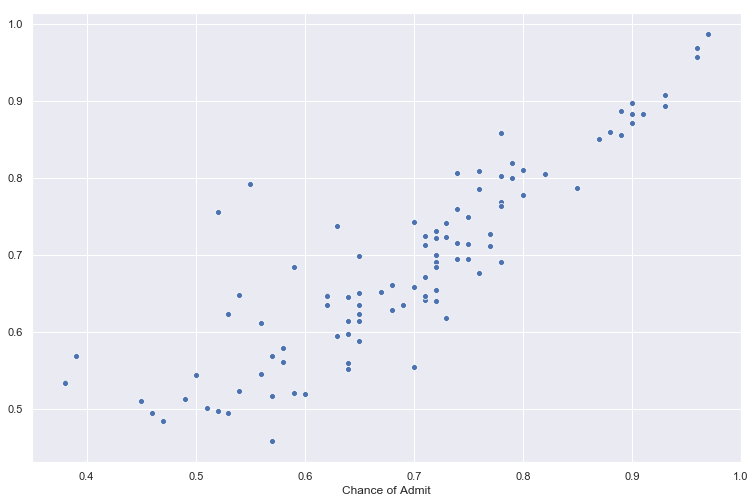

In [40]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
# sns.(y_test, y_pred)
sns.scatterplot(y_test, y_pred)
plt.show()

### Linear Regression (Selected Features)

In [41]:
X_selected = X[['CGPA', 'GRE Score', 'TOEFL Score']]
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_selected, y, random_state=101)

In [42]:
lr_sel = LinearRegression()
lr_sel.fit(X_sel_train, y_train)
lr_sel_predictions = lr_sel.predict(X_sel_test)

In [43]:
lr_sel_r2 = r2_score(y_test, lr_sel_predictions)
lr_sel_mse = mean_squared_error(y_test, lr_sel_predictions)
lr_sel_rmse = np.sqrt(lr_sel_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_sel_r2, lr_sel_mse, lr_sel_rmse))

Linear Regression R2 Score: 0.7268517110749726 
Linear Regression MSE: 0.004792648951546973, 
Linear Regression RMSE:0.0692289603529258


### 2. Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(X_train,y_train)
y_head_rfr = rfr.predict(X_test) 

In [45]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_rfr))

r_square score:  0.7022813171807072


### 3. Decision Tree 

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test) 

In [47]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))

r_square score:  0.42693360750850906


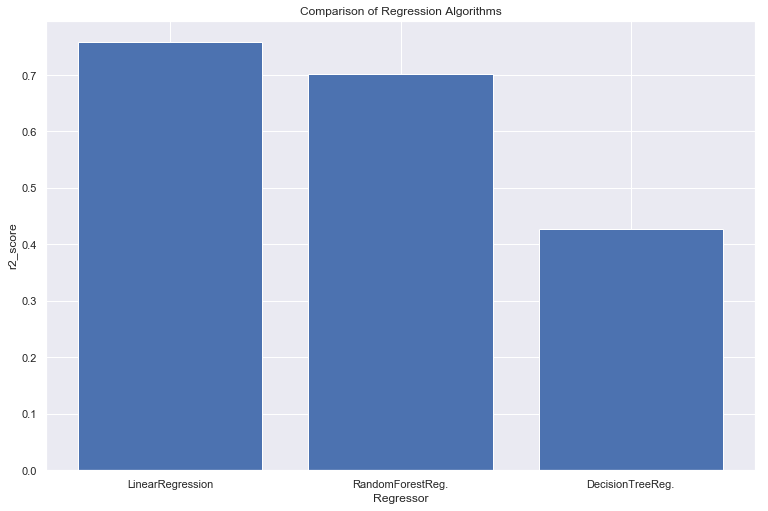

In [48]:
y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

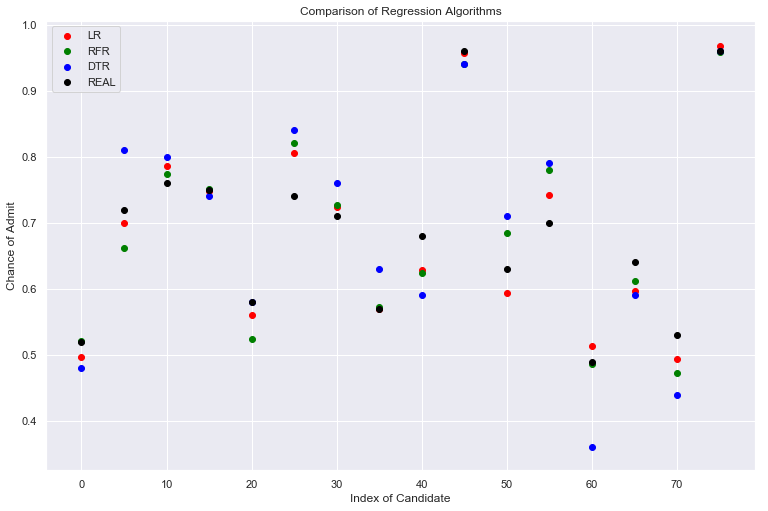

In [49]:
red = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

Comment:

Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted

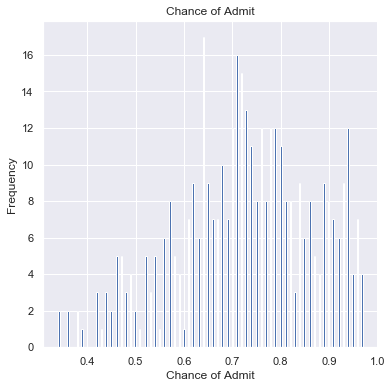

In [50]:
data["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

## Prediction Models : Classification Algorithm (Supervised Machine Learning)

1. Logistic Regression
2. Support Vector Machine
3. Gaussian Naive Bayes
4. Decision Tree Classification
5. Random Forest Classification
6. K Nearest Neighbors (KNN) Classification

### Preparing Data for Classification

If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.

If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

In [4]:
# reading the dataset
df = pd.read_csv("D:\\dataset\\Admission_Predict.csv")
df.shape

(400, 9)

In [5]:
# it may be needed in the future.
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [6]:
X = df.drop(["Chance of Admit"],axis=1)
y = df["Chance of Admit"].values

In [7]:
# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [8]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 

In [9]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

### 1. Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train_01)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_predlogr = logr.predict(X_test)

In [49]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))

Accuracy Score: 0.95


In [75]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

[[65  3]
 [ 1 11]]


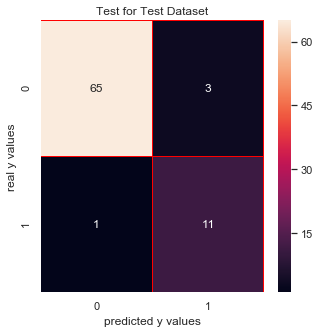

In [76]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [77]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.7857142857142857
recall_score:  0.9166666666666666
f1_score:  0.8461538461538461


##### Test for Train Dataset:

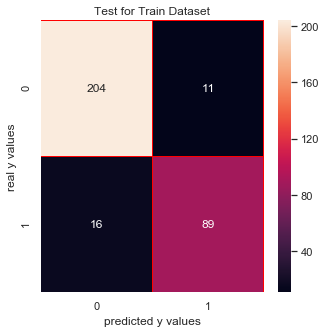

In [80]:
cm_lrc_train = confusion_matrix(y_train_01,logr.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### 2. Support Vector Machine

In [52]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train_01)
y_pred_svm = svm.predict(X_test)
print("score: ", svm.score(X_test,y_test_01))

score:  0.975


E:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[67,  1],
       [ 1, 11]], dtype=int64)

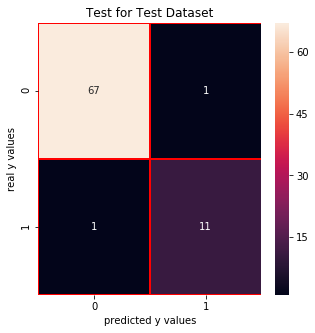

In [54]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [55]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_svm))
print("recall_score: ", recall_score(y_test_01,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_svm))

precision_score:  0.9166666666666666
recall_score:  0.9166666666666666
f1_score:  0.9166666666666666


Test for Train Dataset:

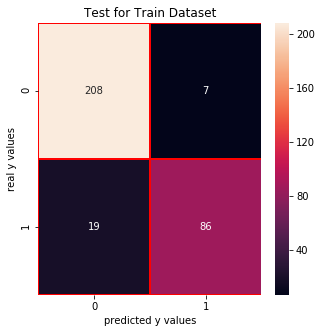

In [56]:
cm_svm_train = confusion_matrix(y_train_01, svm.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### 3. Gaussian Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train_01)
y_pred_nb = nb.predict(X_test)
print("score: ", nb.score(X_test,y_test_01))

score:  0.9375


In [58]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01, y_pred_nb)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_nb

array([[63,  5],
       [ 0, 12]], dtype=int64)

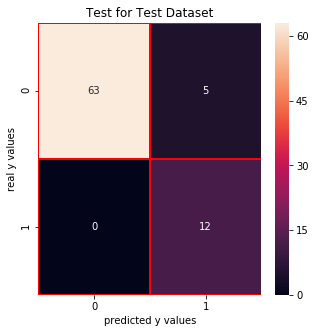

In [59]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [60]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_nb))
print("recall_score: ", recall_score(y_test_01,y_pred_nb))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_nb))

precision_score:  0.7058823529411765
recall_score:  1.0
f1_score:  0.8275862068965517


Test for Train Dataset:

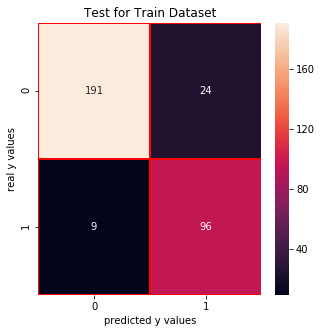

In [61]:
cm_nb_train = confusion_matrix(y_train_01,nb.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### 4. Decision Tree Classification 

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train_01)
y_pred_dtc = dtc.predict(X_test)
print("score: ", dtc.score(X_test,y_test_01))

score:  0.9375


In [63]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc

array([[65,  3],
       [ 2, 10]], dtype=int64)

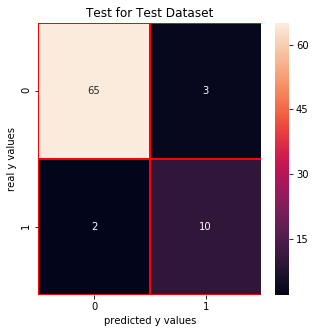

In [64]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [65]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_dtc))
print("recall_score: ", recall_score(y_test_01, y_pred_dtc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_dtc))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


Test for Train Dataset:

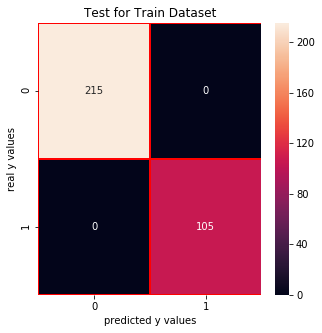

In [66]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### 5. Random Forest Classification

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(X_train,y_train_01)

y_pred_rfc = rfc.predict(X_test)

print("score: ", rfc.score(X_test, y_test_01))

score:  0.9375


In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01, y_pred_rfc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_rfc

array([[65,  3],
       [ 2, 10]], dtype=int64)

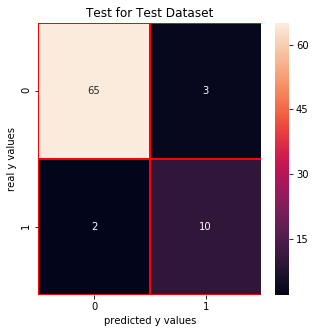

In [16]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_rfc))
print("recall_score: ", recall_score(y_test_01, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_rfc))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


Test for Train Dataset:

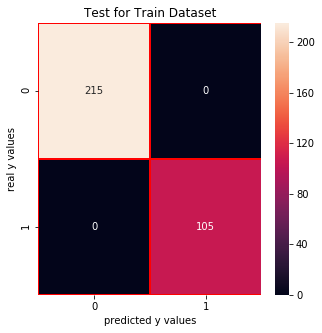

In [21]:
cm_rfc_train = confusion_matrix(y_train_01, rfc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### 6. K Nearest Neighbors Classification

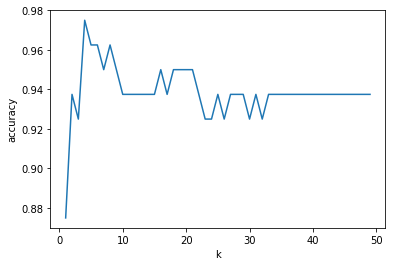

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train, y_train_01)
    scores.append(knn_n.score(X_test, y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train, y_train_01)

y_pred_knn = knn.predict(X_test)
print("score of 3 :",knn.score(X_test,y_test_01))

score of 3 : 0.925


In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01, y_pred_knn)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_knn

array([[63,  5],
       [ 1, 11]], dtype=int64)

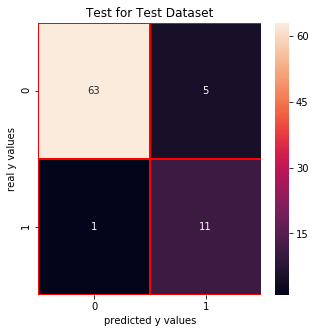

In [39]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [41]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_knn))
print("recall_score: ", recall_score(y_test_01, y_pred_knn))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_knn))

precision_score:  0.6875
recall_score:  0.9166666666666666
f1_score:  0.7857142857142857


Test for Train Dataset:

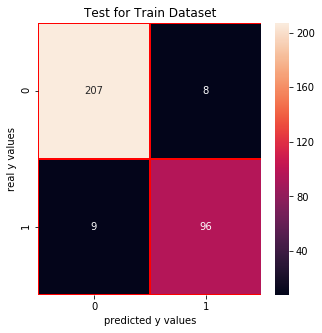

In [44]:
cm_knn_train = confusion_matrix(y_train_01,knn.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### Comparison of Classification Algorithms

All classification algorithms achieved around 90% success. The most successful one is Gaussian Naive Bayes with 96% score.

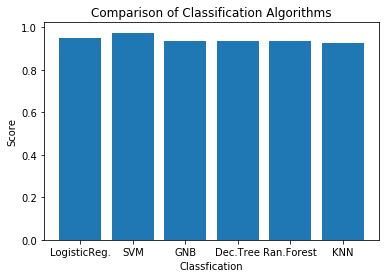

In [69]:
y = np.array([logr.score(X_test, y_test_01), svm.score(X_test, y_test_01), nb.score(X_test, y_test_01), dtc.score(X_test,y_test_01), rfc.score(X_test, y_test_01), knn.score(X_test, y_test_01)])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
x = ["LogisticReg.", "SVM", "GNB", "Dec.Tree", "Ran.Forest", "KNN"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()

## CLUSTERING ALGORITHMS (UNSUPERVISED MACHINE LEARNING ALGORITHMS)


#### Preparing Data for Classification

In [92]:
data = pd.read_csv("D:\\dataset\\Admission_Predict.csv")
data.shape

(400, 9)

In [93]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [94]:
data = data.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})
serial = data["Serial No."]
data.drop(["Serial No."],axis=1,inplace = True)

In [96]:
data = (data - np.min(data))/(np.max(data)-np.min(data))
X = data.drop(["ChanceOfAdmit"],axis=1)
y = data.ChanceOfAdmit

### 1. Preparing Data for Clustering (PCA)

* All features (x) were collected in one feature with Principal Component Analysis.

In [97]:
# for data visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten= True )  # whitten = normalize
pca.fit(X)
x_pca = pca.transform(X)
x_pca = x_pca.reshape(400,)
dictionary = {"x":x_pca,"y":y}
data1 = pd.DataFrame(dictionary)
print("data:")
print(data1.head())
print("\ndata:")
print(data.head())

data:
          x         y
0 -1.377553  0.920635
1 -0.919033  0.666667
2 -0.320986  0.603175
3 -0.520960  0.730159
4  1.137743  0.492063

data:
   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  
0       1.0       0.920635  
1       1.0       0.666667  
2       1.0       0.603175  
3       1.0       0.730159  
4       0.0       0.492063  


### 2. K-means Clustering

* The elbow method is used to determine the best number of clusters for k-means clustering. The number is 3.

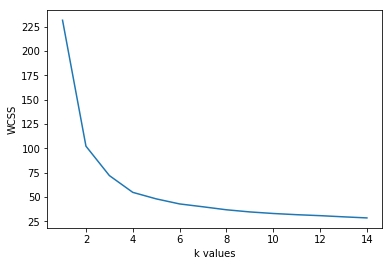

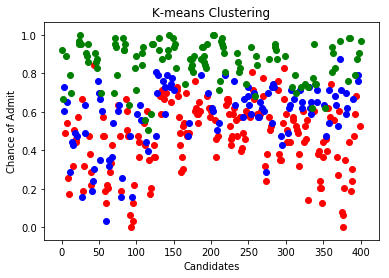

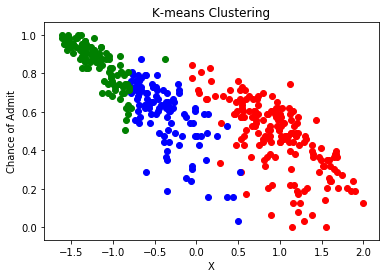

In [104]:
df["Serial No."] = serial
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(X)

data["label_kmeans"] = clusters_knn


plt.scatter(data[data.label_kmeans == 0 ]["Serial No."], data[data.label_kmeans == 0].ChanceOfAdmit,color = "red")
plt.scatter(data[data.label_kmeans == 1 ]["Serial No."], data[data.label_kmeans == 1].ChanceOfAdmit,color = "blue")
plt.scatter(data[data.label_kmeans == 2 ]["Serial No."], data[data.label_kmeans == 2].ChanceOfAdmit,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

df["label_kmeans"] = clusters_knn
plt.scatter(data1.x[data.label_kmeans == 0 ],data1[data.label_kmeans == 0].y,color = "red")
plt.scatter(data1.x[data.label_kmeans == 1 ],data1[data.label_kmeans == 1].y,color = "blue")
plt.scatter(data1.x[data.label_kmeans == 2 ],data1[data.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

### 3. Hierarchical Clustering

* The dendrogram method is used to determine the best number of clusters for hierarchical clustering. The number is 3 again.

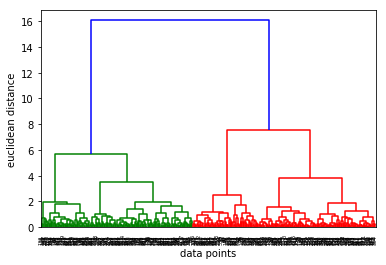

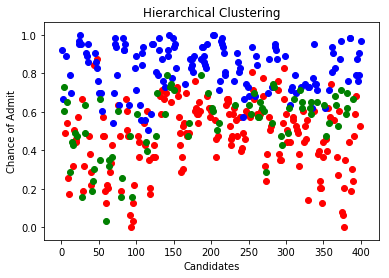

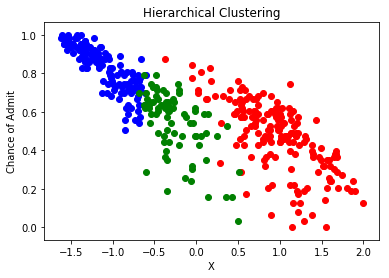

In [109]:
data["Serial No."] = serial

from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(X, method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3, affinity= "euclidean", linkage = "ward")
clusters_hiyerartical = hiyerartical_cluster.fit_predict(X)

data["label_hiyerartical"] = clusters_hiyerartical

plt.scatter(data[data.label_hiyerartical == 0 ]["Serial No."],data[data.label_hiyerartical == 0].ChanceOfAdmit,color = "red")
plt.scatter(data[data.label_hiyerartical == 1 ]["Serial No."],data[data.label_hiyerartical == 1].ChanceOfAdmit,color = "blue")
plt.scatter(data[data.label_hiyerartical == 2 ]["Serial No."],data[data.label_hiyerartical == 2].ChanceOfAdmit,color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

plt.scatter(data1[data.label_hiyerartical == 0 ].x,data1.y[data.label_hiyerartical == 0],color = "red")
plt.scatter(data1[data.label_hiyerartical == 1 ].x,data1.y[data.label_hiyerartical == 1],color = "blue")
plt.scatter(data1[data.label_hiyerartical == 2 ].x,data1.y[data.label_hiyerartical == 2],color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

#### Comparison of Clustering Algorithms

K-means Clustering and Hierarchical Clustering are similarly.

### THE THREE IMPORTANT FEATURES

#### Correlation between All Columns

The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE

The 3 least important features for admission to the Master: Research, LOR, and SOP

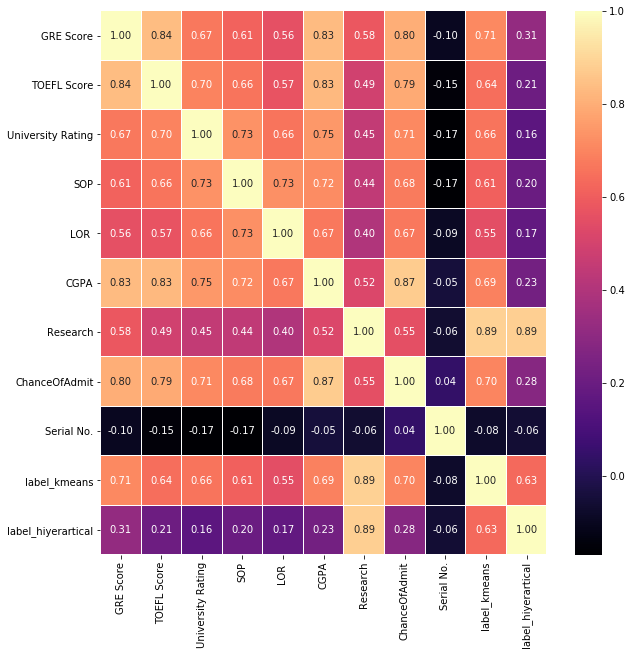

In [111]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

#### The Three Features for Linear Regression

* The first results for Linear Regression (7 features): 
r_square score: 0.821208259148699

* The results for Linear Regression now (3 features):
r_square score: 0.8212241793299223

* The two results are very close. If these 3 features (CGPA, GRE SCORE, and TOEFL SCORE) are used instead of all 7 features together, the result is not bad and performance is increased because less calculation is required.

In [119]:
df = pd.read_csv('D:\\dataset\\Admission_Predict.csv')
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

newDF = pd.DataFrame()
newDF["GRE Score"] = df["GRE Score"]
newDF["TOEFL Score"] = df["TOEFL Score"]
newDF["CGPA"] = df["CGPA"]
newDF["Chance of Admit"] = df["Chance of Admit"]

x_new = df.drop(["Chance of Admit"],axis=1)
y_new = df["Chance of Admit"].values

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size = 0.20, random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train_new[x_train_new.columns] = scalerX.fit_transform(x_train_new[x_train_new.columns])
x_test_new[x_test_new.columns] = scalerX.transform(x_test_new[x_test_new.columns])

from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(x_train_new, y_train_new)
y_head_lr_new = lr_new.predict(x_test_new)

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test_new, y_head_lr_new))

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy

r_square score:  0.8212241793299224
